# Kaggle Digit Recognizer 

[kaggle_link]('https://www.kaggle.com/oendric/kerneld9caf6b096')

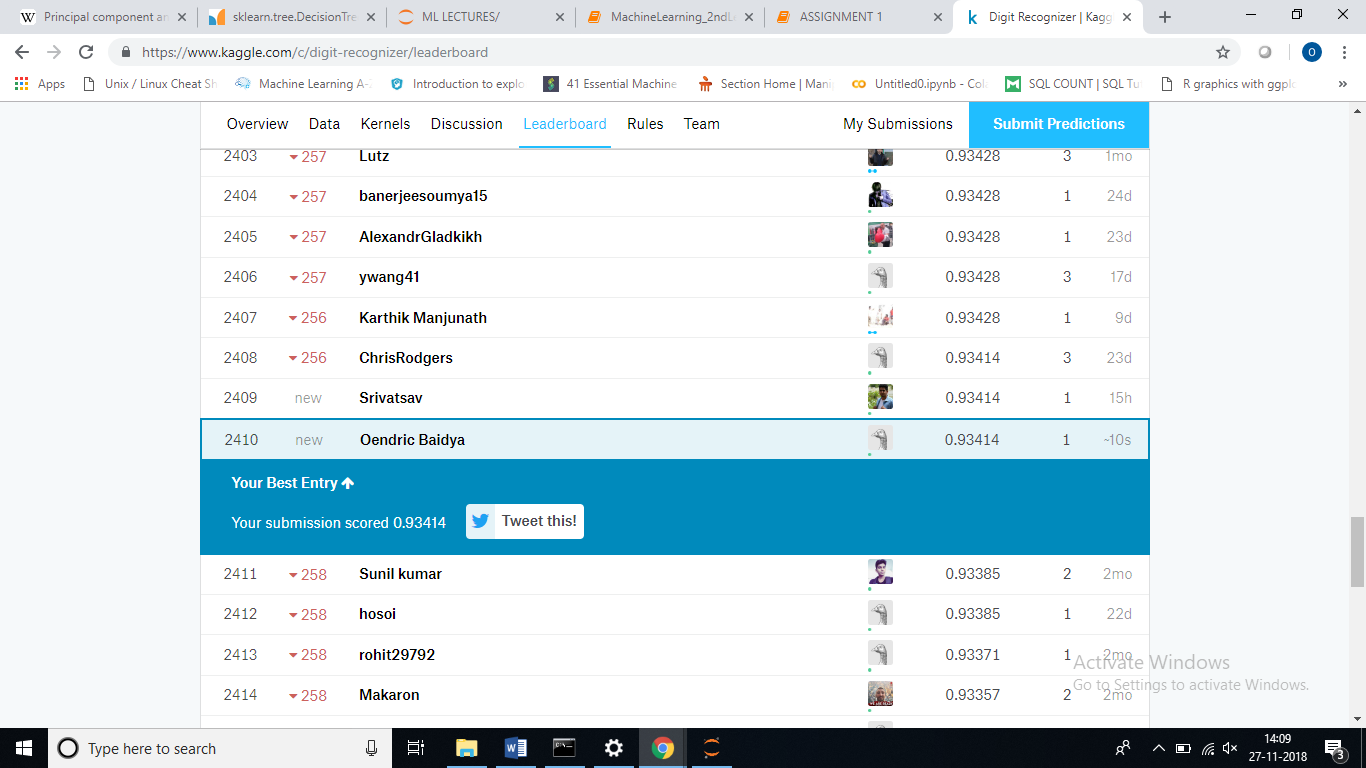

In [34]:
from IPython.display import Image
Image(filename='Screenshot (1).png')

In [35]:
digit_recog= pd.read_csv('C:/Users/Administrator/Anaconda3/datasets/digit_recog.csv')
digit_recog.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#making dummy Variable
digit_recog_dummies=pd.get_dummies(digit_recog)
digit_recog_dummies.head()


#splitting the data into train n test
train, test = train_test_split(digit_recog_dummies,
                               test_size=0.3,
                               random_state=100)

#setting the input and output 
train_y = train['label']
test_y = test['label']
train_x = train.drop('label', axis=1)
test_x = test.drop('label', axis=1)
train_x.shape


(29400, 784)

# Decision Tree

In [37]:

model = DecisionTreeClassifier(random_state=100)
model.fit(train_x, train_y)

test_pred = model.predict(test_x)
df_pred_dt = pd.DataFrame({'actual': test_y,
                        'predicted': test_pred})
df_pred_dt['pred_status'] = df_pred_dt['actual'] == df_pred_dt['predicted']
df_pred_dt['pred_status'].sum() / df_pred_dt.shape[0] * 100

84.9920634920635

# Random Forest

In [38]:
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(train_x, train_y)


test_pred = model_rf.predict(test_x)
df_pred_rf = pd.DataFrame({'actual': test_y,
                        'predicted': test_pred})
df_pred_rf['pred_status'] = df_pred_rf['actual'] == df_pred_rf['predicted']
df_pred_rf['pred_status'].sum() / df_pred_rf.shape[0] * 100

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


93.54761904761905

# Adaboost 

In [39]:
model = AdaBoostClassifier(random_state=100)
model.fit(train_x ,train_y)

test_pred = model.predict(test_x)
df_pred_adaboo = pd.DataFrame({'actual': test_y,
                        'predicted': test_pred})
df_pred_adaboo['pred_status'] = df_pred_adaboo['actual'] == df_pred_adaboo['predicted']
df_pred_adaboo['pred_status'].sum() / df_pred_adaboo.shape[0] * 100

70.77777777777777

# kNN Using feature scaling

In [40]:

scaler = StandardScaler()
scaler.fit(train_x)
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x,train_y)

test_pred = model.predict(test_x)
df_pred_knn = pd.DataFrame({'actual': test_y,
                        'predicted': test_pred})
df_pred_knn['pred_status'] = df_pred_knn['actual'] == df_pred_knn['predicted']
df_pred_knn['pred_status'].sum() / df_pred_knn.shape[0] * 100

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


70.77777777777777